In [92]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
sharks = pd.read_csv("clean_data",encoding = "ISO-8859-1")


In [94]:
sharks.head()

,Unnamed: 0,Date,Year,Type,Country,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
0,0,25-Jun-2018,2018.0,Boating,USA,Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,1,18-Jun-2018,2018.0,Unprovoked,USA,Standing,AdysonÂ McNeely,F,11,Minor injury to left thigh,N
2,2,09-Jun-2018,2018.0,Invalid,USA,Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N
3,3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,Surfing,male,M,NaN,Minor injury to lower leg,N
4,4,04-Jun-2018,2018.0,Provoked,MEXICO,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N


Now i have imported the cleaned data from the previouse step. I will delete the index created by the importing of the .csv file

In [95]:
sharks=sharks.drop(columns=['Unnamed: 0'])

In [96]:
sharks.dropna()

,Date,Year,Type,Country,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
0,25-Jun-2018,2018.0,Boating,USA,Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,18-Jun-2018,2018.0,Unprovoked,USA,Standing,AdysonÂ McNeely,F,11,Minor injury to left thigh,N
2,09-Jun-2018,2018.0,Invalid,USA,Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N
6,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Swimming,Jose Ernesto da Silva,M,18,FATAL,Y
7,27-May-2018,2018.0,Unprovoked,USA,Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N
...,...,...,...,...,...,...,...,...,...,...
6243,1960s,0.0,Unprovoked,IRAQ,Swimming in section of river used for washing ...,male,M,16,Right leg lacerated & surgically amputated,N
6254,Before 1957,0.0,Provoked,CUBA,"Shark fishing, knocked overboard",Sandrillio,M,50,"FATAL, hip bitten PROVOKED INCIDENT",Y
6265,1941-1942,0.0,Unprovoked,IRAQ,Swimming,male,M,13 or 14,"FATAL, left leg bitten with severe blood loss",Y
6276,Early 1930s,0.0,Unprovoked,BELIZE,Standing,a servant,M,16,FATAL,Y


First I want to check in which countries this attacks occur.

In [97]:
sharks['Country'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNITE

In [98]:
sharks['Country'].value_counts()

USA                  2229
AUSTRALIA            1338
SOUTH AFRICA          579
PAPUA NEW GUINEA      134
NEW ZEALAND           128
                     ... 
FALKLAND ISLANDS        1
THE BALKANS             1
ADMIRALTY ISLANDS       1
BAY OF BENGAL           1
ANGOLA                  1
Name: Country, Length: 212, dtype: int64

USA is the country with the highest shark attacks in the world. Followed by Australia and South Africa. I will first use a Pie Chart to visualize this

<AxesSubplot:title={'center':'TOP TEN COUNTRIES'}, ylabel='Country'>

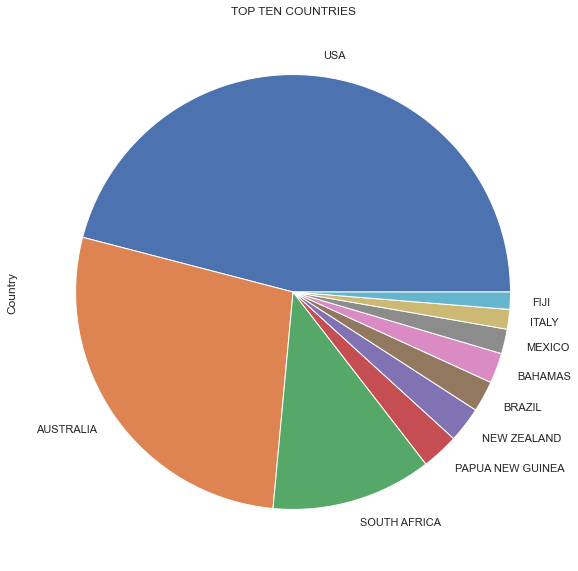

In [215]:
sharks['Country'].value_counts().nlargest(10). plot.pie(figsize=(10,10), title = "TOP TEN COUNTRIES")

In the pie chart above we can see the 10 countries with the most shark attacks. I used the nlargest() function to choose how many countries to show. and figsize() to choose the size of the chart, as well as adding a title.


The three countries with the biggest attacks have more attacks than the rest of the countries. Therefore I will evaluate those.
MY HYPOTHESIS is that the mean age of the three countries that I will evaluate are around the same.

The first country I will look at has the most attacks. USA.

In [151]:
sharks_usa = sharks[(sharks["Country"]== "USA")]
sharks_usa

,Date,Year,Type,Country,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
0,25-Jun-2018,2018.0,Boating,USA,Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,18-Jun-2018,2018.0,Unprovoked,USA,Standing,AdysonÂ McNeely,F,11,Minor injury to left thigh,N
2,09-Jun-2018,2018.0,Invalid,USA,Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N
7,27-May-2018,2018.0,Unprovoked,USA,Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N
8,26-May-2018,2018.0,Unprovoked,USA,Walking,Cody High,M,15,Lower left leg bitten,N
...,...,...,...,...,...,...,...,...,...,...
6249,Before 1958,0.0,Unprovoked,USA,Standing,Horton Chase,M,NaN,Abrasions & bruises hip to ankle,N
6283,Before 1921,0.0,Unprovoked,USA,Fishing,James Kelley,M,NaN,2-inch lacerations,N
6288,Before 17-Jul-1916,0.0,Unprovoked,USA,Swimming,"""youthful male""",M,NaN,"""Lost leg""",N
6292,Circa 1862,0.0,Unprovoked,USA,NaN,"A ""chiefess""",F,NaN,Ankle bitten,N


In [152]:
sharks_usa.head()



,Date,Year,Type,Country,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
0,25-Jun-2018,2018.0,Boating,USA,Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,18-Jun-2018,2018.0,Unprovoked,USA,Standing,AdysonÂ McNeely,F,11,Minor injury to left thigh,N
2,09-Jun-2018,2018.0,Invalid,USA,Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N
7,27-May-2018,2018.0,Unprovoked,USA,Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N
8,26-May-2018,2018.0,Unprovoked,USA,Walking,Cody High,M,15,Lower left leg bitten,N


In [164]:
sharks_usa.tail()

,Date,Year,Type,Country,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Year1
6249,Before 1958,0.0,Unprovoked,USA,Standing,Horton Chase,M,NaN,Abrasions & bruises hip to ankle,N,Before 1958
6283,Before 1921,0.0,Unprovoked,USA,Fishing,James Kelley,M,NaN,2-inch lacerations,N,Before 1921
6288,Before 17-Jul-1916,0.0,Unprovoked,USA,Swimming,"""youthful male""",M,NaN,"""Lost leg""",N,Before 17-Jul-1916
6292,Circa 1862,0.0,Unprovoked,USA,NaN,"A ""chiefess""",F,NaN,Ankle bitten,N,Circa 1862
6299,1900-1905,0.0,Unprovoked,USA,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,1900-1905


In [165]:
sharks_usa["Age"].value_counts()

16             68
15             67
17             65
19             61
18             59
               ..
?    &   14     1
60's            1
65              1
60s             1
75              1
Name: Age, Length: 100, dtype: int64

In [168]:
sharks_usa['Age'].unique()


array(['57', '11', '48', '52', '15', '12', '10', '29', '25', '54', '35',
       '14', nan, '17', '60', '40', '33', '28', '18', '3', '69', '13',
       '34', '8', '50', '46', '16', '19', '20', '21', '51', '58', '22',
       'Teen', '47', '41', '42', '36', '66', '32', '43', '60s', '9', '37',
       '49', '61', '59', '6', '27', '64', '23', '26', '71', '44', '31',
       '38', '39', '68', '30', '65', '63', '70', '53', '7', '20s', '45',
       '50s', 'teen', '56', '24', '55', '30s', '5', '86', '12 or 13',
       '62', 'Teens', '8 or 10', 'Â\xa0 ', '6Â½', 'mid-30s', '73',
       '23 & 20', '7      &    31', ' 28', "60's", '87', '67', '77',
       'Elderly', 'mid-20s', 'Ca. 33', '75', '21 or 26', 'adult',
       '9 & 12', '37, 67, 35, 27,  ? & 27', ' 43', '?    &   14',
       '10 or 12', 'young'], dtype=object)

In [170]:
!pip3 install regex


     |████████████████████████████████| 284 kB 803 kB/s eta 0:00:01


In [172]:
import re
import statistics
def ages(i):
    try:
        pattern = r'(\d{2})'
        busca = re.findall(pattern, i)
        return int(busca[0])

    except:
        return np.nan
    

In [173]:
sharks_usa['Ages'] = sharks_usa['Age'].apply(ages)

<ipython-input-173-3260532ee192>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_usa['Ages'] = sharks_usa['Age'].apply(ages)


In [174]:
sharks_usa['Ages'].unique()


array([57., 11., 48., 52., 15., 12., 10., 29., 25., 54., 35., 14., nan,
       17., 60., 40., 33., 28., 18., 69., 13., 34., 50., 46., 16., 19.,
       20., 21., 51., 58., 22., 47., 41., 42., 36., 66., 32., 43., 37.,
       49., 61., 59., 27., 64., 23., 26., 71., 44., 31., 38., 39., 68.,
       30., 65., 63., 70., 53., 45., 56., 24., 55., 86., 62., 73., 87.,
       67., 77., 75.])

In [175]:
sharks_usa['Ages'].isnull()

0       False
1       False
2       False
7       False
8       False
        ...  
6249     True
6283     True
6288     True
6292     True
6299     True
Name: Ages, Length: 2229, dtype: bool

In [176]:
sharks_usa['Ages'].isnull().sum()

817

In [182]:
sharks_usa['Ages'].dropna()

0       57.0
1       11.0
2       48.0
7       52.0
8       15.0
        ... 
6036    15.0
6061    15.0
6089    52.0
6200    21.0
6226    19.0
Name: Ages, Length: 1412, dtype: float64

In [183]:
sharks_usa['Ages'].value_counts()

16.0    68
15.0    67
17.0    65
19.0    61
18.0    59
        ..
64.0     1
75.0     1
86.0     1
87.0     1
73.0     1
Name: Ages, Length: 67, dtype: int64

In [188]:
sharks_usa.head(10)

,Date,Year,Type,Country,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Year1,Ages
0,25-Jun-2018,2018.0,Boating,USA,Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,25-Jun-2018,57.0
1,18-Jun-2018,2018.0,Unprovoked,USA,Standing,AdysonÂ McNeely,F,11,Minor injury to left thigh,N,18-Jun-2018,11.0
2,09-Jun-2018,2018.0,Invalid,USA,Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,09-Jun-2018,48.0
7,27-May-2018,2018.0,Unprovoked,USA,Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,27-May-2018,52.0
8,26-May-2018,2018.0,Unprovoked,USA,Walking,Cody High,M,15,Lower left leg bitten,N,26-May-2018,15.0
9,26-May-2018,2018.0,Unprovoked,USA,Standing,male,M,12,Minor injury to foot,N,26-May-2018,12.0
11,21-May-2018,2018.0,Unprovoked,USA,Boogie boarding,Trey de Boer,M,10,Injuries to lower right leg and foot,N,21-May-2018,10.0
12,13-May-2018,2018.0,Unprovoked,USA,Swimming,Jei Turrell,M,10,Severe bite to right forearm,N,13-May-2018,10.0
25,19-Apr-2018,2018.0,Unprovoked,USA,Body boarding,Dylan McWilliams,M,29,Lacerations to right lower leg,N,19-Apr-2018,29.0
35,31-Mar-2018,2018.0,Unprovoked,USA,Stand-Up Paddleboarding,male,M,25,Injuries to right leg & hand,N,31-Mar-2018,25.0


In [189]:
len(sharks_usa['Ages'].unique())

68

<AxesSubplot:xlabel='Ages', ylabel='Count'>

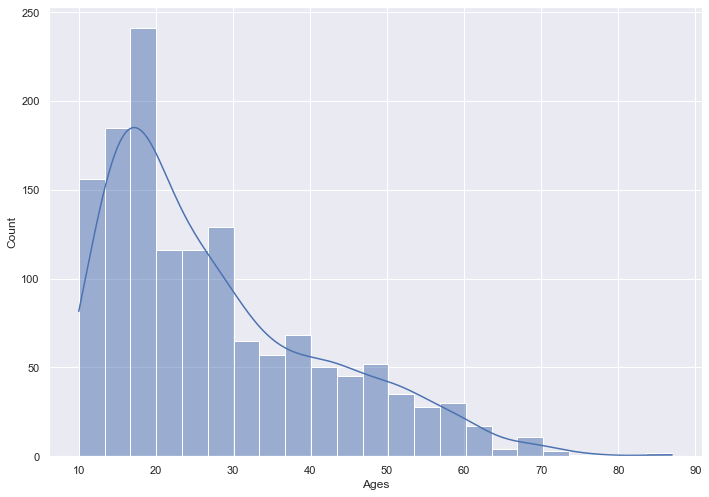

In [217]:
sns.histplot(x=sharks_usa.Ages, kde=True)

From the graph above we see that most of the attacks in the USA occur to young people. Especially, those between 10 to 30. I will calculate the mean to see if this is in fact, True

In [231]:
sharks_usa_average = sharks_usa['Ages'].mean()
sharks_usa_average

27.78611898016997

In [232]:
sharks_usa_average.round()

28.0

The mean age of the victims in the USA is around 28, now I will look at the second biggest country. Australia.

In [200]:
sharks

,Date,Year,Type,Country,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
0,25-Jun-2018,2018.0,Boating,USA,Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,18-Jun-2018,2018.0,Unprovoked,USA,Standing,AdysonÂ McNeely,F,11,Minor injury to left thigh,N
2,09-Jun-2018,2018.0,Invalid,USA,Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,Surfing,male,M,NaN,Minor injury to lower leg,N
4,04-Jun-2018,2018.0,Provoked,MEXICO,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N
...,...,...,...,...,...,...,...,...,...,...
6307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
sharks_australia = sharks[(sharks["Country"] == "AUSTRALIA")]
sharks_australia

,Date,Year,Type,Country,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,Surfing,male,M,NaN,Minor injury to lower leg,N
5,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,Kite surfing,Chris Â,M,NaN,"No injury, board bitten",N
10,24-May-2018,2018.0,Provoked,AUSTRALIA,Feeding sharks,male,M,32,Minor bite to hand by captive shark. PROVOKED ...,N
14,May 2018,2018.0,Provoked,AUSTRALIA,Feeding sharks,Melisa Brunning,F,34,Shallow lacerations to finger PROVOKED INCIDENT,N
16,09-May-2018,2018.0,Questionable,AUSTRALIA,Surfing,male,M,NaN,"No injury, surfboard damaged",N
...,...,...,...,...,...,...,...,...,...,...
6294,Before 1906,0.0,Unprovoked,AUSTRALIA,Fishing,fisherman,M,NaN,FATAL,Y
6295,Before 1906,0.0,Unprovoked,AUSTRALIA,Fishing,fisherman,M,NaN,FATAL,Y
6296,Before 1906,0.0,Unprovoked,AUSTRALIA,Swimming,Arab boy,M,NaN,FATAL,Y
6297,Before 1903,0.0,Unprovoked,AUSTRALIA,Diving,male,M,NaN,FATAL,Y


In [204]:
sharks_australia["Age"].value_counts()

17         47
18         38
20         32
19         27
15         26
           ..
teen        1
50s         1
            1
17 & 16     1
30 & 32     1
Name: Age, Length: 89, dtype: int64

In [205]:
sharks_australia['Ages'] = sharks_australia['Age'].apply(ages)

<ipython-input-205-11d4009bc7ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_australia['Ages'] = sharks_australia['Age'].apply(ages)


In [207]:
sharks_australia['Ages'].isnull().sum()

633

In [208]:
sharks_australia.dropna()

,Date,Year,Type,Country,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Ages
10,24-May-2018,2018.0,Provoked,AUSTRALIA,Feeding sharks,male,M,32,Minor bite to hand by captive shark. PROVOKED ...,N,32.0
14,May 2018,2018.0,Provoked,AUSTRALIA,Feeding sharks,Melisa Brunning,F,34,Shallow lacerations to finger PROVOKED INCIDENT,N,34.0
21,25-Apr-2018,2018.0,Unprovoked,AUSTRALIA,Surfing,Rob Bruce,M,60,"No injury, knocked off board by shark",N,60.0
28,15-Apr-2018,2018.0,Unprovoked,AUSTRALIA,Surfing,Jason Longrass,M,41,Laceration to right thigh,N,41.0
29,15-Apr-2018,2018.0,Unprovoked,AUSTRALIA,Surfing,Alejandro Travaglini,M,37,Lacerations to legs,N,37.0
...,...,...,...,...,...,...,...,...,...,...,...
5917,09-Jan-1870,1870.0,Unprovoked,AUSTRALIA,Bathing,John Saunders,M,17,Right thigh bitten,N,17.0
5958,10-Jan-1863,1863.0,Unprovoked,AUSTRALIA,Bathing,James Brown,M,17,FATAL,Y,17.0
5991,14-Mar-1858,1858.0,Unprovoked,AUSTRALIA,Bathing,Adolphe Bollander,M,22,FATAL,Y,22.0
5998,06-Feb-1856,1856.0,Unprovoked,AUSTRALIA,Swimming,a seaman from the John and Lucy,M,17,Severe bite to thigh. Not known if he survived,UNKNOWN,17.0


In [209]:
sharks_australia['Ages'].value_counts()

17.0    49
18.0    38
20.0    32
19.0    28
15.0    26
        ..
71.0     1
64.0     1
74.0     1
84.0     1
54.0     1
Name: Ages, Length: 62, dtype: int64

For this graph I will try to use a countplot. However, I believe there are two many values so I might have to create another column for a range of ages.


<AxesSubplot:xlabel='Ages', ylabel='count'>

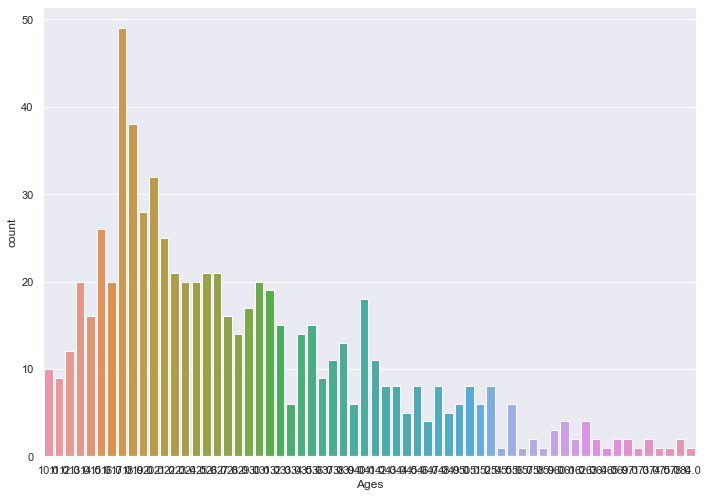

In [210]:
sns.countplot(x= sharks_australia.Ages)

As predicted, we can see that the numbers are clogged up together and not clear, there is a tendency to see values lower in the spectrum towards the lower ages, however, we want to make it clearer

In [226]:
sharks_australia['Ranges'] = pd.cut(sharks_australia.Ages, bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
sharks_australia

<ipython-input-226-8c3e2ded67a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_australia['Ranges'] = pd.cut(sharks_australia.Ages, bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])


,Date,Year,Type,Country,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Ages,Ranges
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,NaN
5,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,Kite surfing,Chris Â,M,NaN,"No injury, board bitten",N,NaN,NaN
10,24-May-2018,2018.0,Provoked,AUSTRALIA,Feeding sharks,male,M,32,Minor bite to hand by captive shark. PROVOKED ...,N,32.0,"(30.0, 40.0]"
14,May 2018,2018.0,Provoked,AUSTRALIA,Feeding sharks,Melisa Brunning,F,34,Shallow lacerations to finger PROVOKED INCIDENT,N,34.0,"(30.0, 40.0]"
16,09-May-2018,2018.0,Questionable,AUSTRALIA,Surfing,male,M,NaN,"No injury, surfboard damaged",N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6294,Before 1906,0.0,Unprovoked,AUSTRALIA,Fishing,fisherman,M,NaN,FATAL,Y,NaN,NaN
6295,Before 1906,0.0,Unprovoked,AUSTRALIA,Fishing,fisherman,M,NaN,FATAL,Y,NaN,NaN
6296,Before 1906,0.0,Unprovoked,AUSTRALIA,Swimming,Arab boy,M,NaN,FATAL,Y,NaN,NaN
6297,Before 1903,0.0,Unprovoked,AUSTRALIA,Diving,male,M,NaN,FATAL,Y,NaN,NaN


<AxesSubplot:xlabel='Ranges', ylabel='count'>

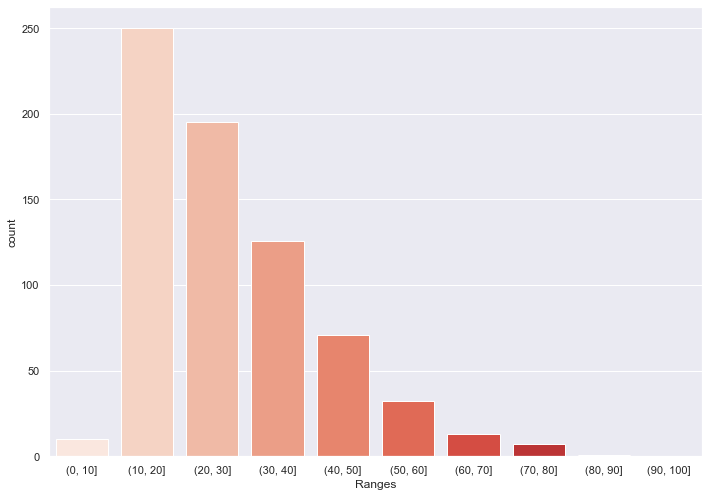

In [227]:
sns.countplot(x=sharks_australia.Ranges, palette="Reds")

In the countplot graph above, each bin shows the victims in a certain range of 10 years of age. It shows that most of the victims are around 10 to 20 years old, followed by 20 to 30, and falling gradually as age increases. This supports the hypothesis that the average age of most attacks is similar in the 3 countries with the most victims. To make sure I will obtain the mean of the age of the Australian victims.

In [235]:
sharks_australia_average = sharks_australia['Ages'].mean()
sharks_australia_average

28.33758865248227

In [236]:
sharks_australia_average.round()

28.0

As it is with the USA victims, the average age of the shark attack victims in Australia also rounds to 28.

Next I will see what is the average age of South African victims.

In [237]:
sharks

,Date,Year,Type,Country,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
0,25-Jun-2018,2018.0,Boating,USA,Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,18-Jun-2018,2018.0,Unprovoked,USA,Standing,AdysonÂ McNeely,F,11,Minor injury to left thigh,N
2,09-Jun-2018,2018.0,Invalid,USA,Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,Surfing,male,M,NaN,Minor injury to lower leg,N
4,04-Jun-2018,2018.0,Provoked,MEXICO,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N
...,...,...,...,...,...,...,...,...,...,...
6307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [239]:
sharks_SA = sharks[(sharks["Country"] == "SOUTH AFRICA")]
sharks_SA

,Date,Year,Type,Country,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
15,12-May-2018,2018.0,Unprovoked,SOUTH AFRICA,Surfing,male,M,NaN,"Minor injury, marks on board",N
24,22-Apr-2018,2018.0,Unprovoked,SOUTH AFRICA,Paddle-skiing,male,M,33,"No injury, shark bit hole in ski",N
34,03-Apr-2018,2018.0,Unprovoked,SOUTH AFRICA,Surfing,Ross Spowart,M,19,Lacerations to left knee & lower leg,N
39,24-Feb-2018,2018.0,Unprovoked,SOUTH AFRICA,Scuba Diving,Elton Polly,M,38,The shark & man simply collided; neither were...,N
76,01-Oct-2017,2017.0,Invalid,SOUTH AFRICA,Scuba Diving,Bradley Fick,M,31,FATAL,NaN
...,...,...,...,...,...,...,...,...,...,...
6281,No date,0.0,Unprovoked,SOUTH AFRICA,Swimming in pool formed by construction of a w...,Indian boy,M,NaN,"FATAL, leg severed",Y
6285,Before 1921,0.0,Unprovoked,SOUTH AFRICA,Crew swimming alongside their anchored ship,male,M,NaN,FATAL,Y
6286,Before 1921,0.0,Unprovoked,SOUTH AFRICA,4 men were bathing,male,M,NaN,FATAL,Y
6289,No date (3 days after preceding incident) & pr...,0.0,Unprovoked,SOUTH AFRICA,Fishing,a native fisherman,M,NaN,"FATAL, body not recovered but shark was caught...",Y


In [240]:
sharks_SA["Age"].value_counts()

22          22
16          21
18          20
20          20
19          18
25          18
14          17
21          16
15          15
17          15
29          15
24          13
23          13
26          12
30          11
33          10
13           8
27           8
28           8
37           7
32           7
35           6
34           5
31           5
36           5
39           5
42           4
12           4
52           4
47           3
46           3
38           3
40           3
43           2
49           2
44           2
>50          1
25 or 28     1
Teen         1
61           1
10           1
36 & 26      1
48           1
64           1
77           1
55           1
68           1
51           1
59           1
50           1
66           1
74           1
Name: Age, dtype: int64

In [241]:
sharks_SA['Ages'] = sharks_SA['Age'].apply(ages)

<ipython-input-241-caf933df0a0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_SA['Ages'] = sharks_SA['Age'].apply(ages)


In [242]:
sharks_SA['Ages'].isnull().sum()

214

In [243]:
sharks_SA.dropna()

,Date,Year,Type,Country,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Ages
24,22-Apr-2018,2018.0,Unprovoked,SOUTH AFRICA,Paddle-skiing,male,M,33,"No injury, shark bit hole in ski",N,33.0
34,03-Apr-2018,2018.0,Unprovoked,SOUTH AFRICA,Surfing,Ross Spowart,M,19,Lacerations to left knee & lower leg,N,19.0
39,24-Feb-2018,2018.0,Unprovoked,SOUTH AFRICA,Scuba Diving,Elton Polly,M,38,The shark & man simply collided; neither were...,N,38.0
123,07-Jul-2017,2017.0,Unprovoked,SOUTH AFRICA,Surfing,Zoe Stein,F,13,"No injury, shark bit surfboard",N,13.0
147,29-Apr-2017,2017.0,Unprovoked,SOUTH AFRICA,Surfing,male,M,14,Minor injury to right calf,N,14.0
...,...,...,...,...,...,...,...,...,...,...,...
5497,06-Apr-1905,1905.0,Unprovoked,SOUTH AFRICA,Swimming,James Anderson,M,26,"FATAL, thigh bitten, femoral artery severed",Y,26.0
5545,30-Jul-1901,1901.0,Unprovoked,SOUTH AFRICA,Swimming,"John Hendrick Adrian Chandler, a prisoner of war",M,29,"Right leg bitten & foot severed, right arm bit...",Y,29.0
5552,14-Nov-1900,1900.0,Unprovoked,SOUTH AFRICA,Swimming,William Strathorn,M,30,"FATAL, legs severed",Y,30.0
5640,29-Apr-1895,1895.0,Unprovoked,SOUTH AFRICA,"""Crossing the river""",Sombutize,M,28,"FATAL, right arm lacerated",Y,28.0


In [244]:
sharks_SA['Ages'].value_counts()

22.0    22
16.0    21
20.0    20
18.0    20
25.0    19
19.0    18
14.0    17
21.0    16
17.0    15
29.0    15
15.0    15
24.0    13
23.0    13
26.0    12
30.0    11
33.0    10
28.0     8
13.0     8
27.0     8
32.0     7
37.0     7
36.0     6
35.0     6
34.0     5
39.0     5
31.0     5
12.0     4
42.0     4
52.0     4
47.0     3
46.0     3
38.0     3
40.0     3
49.0     2
43.0     2
50.0     2
44.0     2
64.0     1
74.0     1
77.0     1
61.0     1
55.0     1
10.0     1
59.0     1
51.0     1
66.0     1
48.0     1
68.0     1
Name: Ages, dtype: int64

<AxesSubplot:xlabel='Ages', ylabel='Count'>

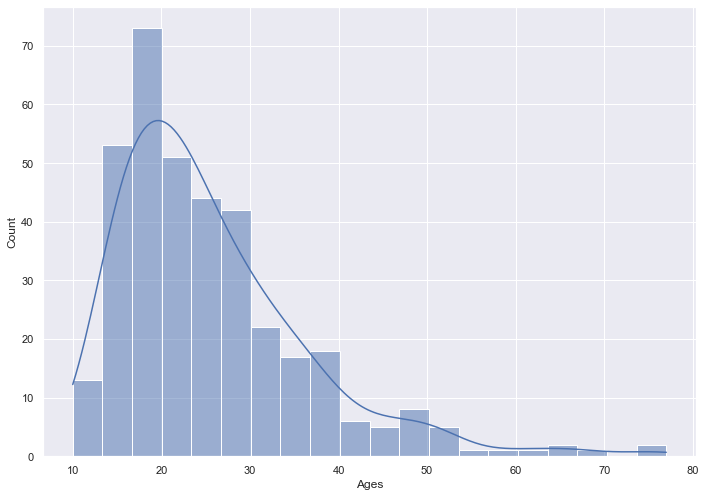

In [245]:
sns.histplot(x=sharks_SA.Ages, kde=True)

Again it appears that most victims fall under the same age. I will obtain the mean to be sure.

In [248]:
sharks_SA_average = sharks_SA['Ages'].mean()
sharks_SA_average

25.70958904109589

In [249]:
sharks_SA_average.round()

26.0

The average age of the victims of South Africa is 26, slightly lower than that of the USA and Australia.

Althoung, South African victims are 'slightly' younger. My hypothesis stands that the average age of the three countries with the most sharks attacks is very similar. With a deviation of only 2 years of age.